In [1]:
import numpy as np
import matplotlib.pyplot as plt
import audacity
import TransferFunctions as tf
import scipy.signal as sig

%matplotlib notebook

In [2]:
dfiles = ['transfer/b-foot/2tieclip_reference_sines.aup']

dfiles.extend(('transfer/b-foot/2301_openstart.aup',
               'transfer/b-foot/2301_closing_2.aup',
               'transfer/b-foot/2301_closing_4.aup',
               'transfer/b-foot/2301_closing_6.aup',
               'transfer/b-foot/2301_closing_8.aup',
               'transfer/b-foot/2301_closing_10.aup',
               'transfer/b-foot/2301_closing_11.aup',
               'transfer/b-foot/2301_closing_12.aup',
               'transfer/b-foot/2301_closing_13.aup',
               'transfer/b-foot/2301_closing_14.aup',
               'transfer/b-foot/2301_closing_15.aup',
               'transfer/b-foot/2301_closing_16.aup',
              ))

In [10]:
def my_tfe(y,x,Fs=1.0, NFFT=1024):
    fy=[]
    fx=[]
    for istart in range(0,len(x)-NFFT,NFFT):
        
        xi = x[istart:istart+NFFT]
        yi = y[istart:istart+NFFT]
        fy.append(np.fft.fft(yi))
        fx.append(np.fft.fft(xi))
        
    fx=np.array(fx)
    fy=np.array(fy)
        
    ff = np.arange(NFFT)/NFFT*Fs
    return np.mean(fy[1:-1],axis=0)/np.mean(fx[1:-1],axis=0),ff,fx,fy
    #return np.mean(fy[1:-1]/fx[1:-1],axis=0),ff

transfer/b-foot/2301_openstart.aup
0
8191
16382
24573
32764
40955
49146
57337
65528
73719
81910
90101
98292
106483
114674
122865
131056
139247
147438
155629
163820
172011
180202
188393
196584
204775
212966
221157
229348
237539
245730
253921
262112
270303
278494
286685
294876
303067
311258
319449
327640
335831
344022
352213
360404
368595
376786
384977
393168
401359
409550
417741
425932
434123
442314
450505
458696
466887
475078
483269
491460
499651
507842
516033
524224
532415
540606
548797
556988
565179
573370
581561
589752
597943
606134
614325
622516
630707
638898
647089
655280
663471
671662
679853
688044
696235
704426
712617
720808
728999
737190
745381
753572
761763
769954
778145
786336
794527
802718
810909
819100
827291
835482
843673
851864
860055
868246
876437
884628
892819
901010
909201
917392
925583
933774
941965
950156
958347
966538
974729
982920
991111
999302
1007493
1015684
1023875
1032066
1040257
1048448
1056639
1064830
1073021
1081212
1089403
1097594
1105785
1113976
1122167
11

<IPython.core.display.Javascript object>


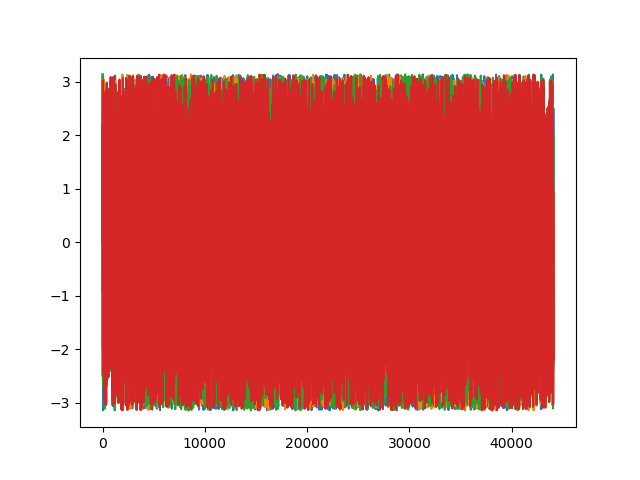

In [37]:
file=dfiles[1]
print(file)
au = audacity.Aup(file)
rdata = []
maxl = 0
for ii in range(au.nchannels):
    rdata.append(au.get_channel_data(ii))
    maxl = max(maxl,len(rdata[-1]))

data = np.zeros((maxl,len(rdata)))
for ii,rd in enumerate(rdata):
    data[:len(rd),ii]=rd

fresp,ff,fx,fy=my_tfe(data[:,3],data[:,2],Fs=au.rate,NFFT=2**13-1)

plt.figure()
#plt.plot(ff,20*np.log10(np.abs(fresp)))
#_=plt.plot(ff,20*np.log10(np.abs(fy)).T)
_=plt.plot(ff,(np.angle(fy)).T[:,1:5])

<IPython.core.display.Javascript object>


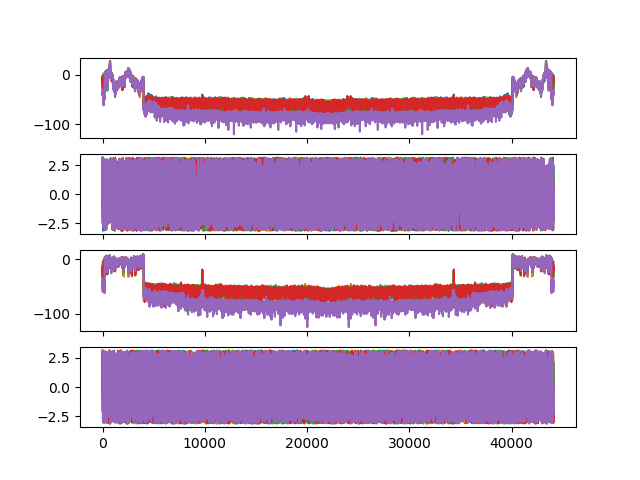

In [38]:
fig,ax = plt.subplots(4,sharex=True)
#plt.plot(ff,20*np.log10(np.abs(fresp)))
#_=plt.plot(ff,20*np.log10(np.abs(fy)).T)
_=ax[0].plot(ff,20*np.log10(np.abs((fy)).T[:,1:5]))
_=ax[1].plot(ff,(np.angle(fy)).T[:,1:5])
_=ax[0].plot(ff,20*np.log10(np.abs(np.mean(fy[1:-1],axis=0))))
_=ax[1].plot(ff,(np.angle(np.mean(fy[1:-1],axis=0))))
_=ax[2].plot(ff,20*np.log10(np.abs((fx)).T[:,1:5]))
_=ax[3].plot(ff,(np.angle(fx)).T[:,1:5])
_=ax[2].plot(ff,20*np.log10(np.abs(np.mean(fx[1:-1],axis=0))))
_=ax[3].plot(ff,(np.angle(np.mean(fx[1:-1],axis=0))))

In [39]:
ff=np.arange(2**13-1)/(2**13-1)*au.rate

<IPython.core.display.Javascript object>


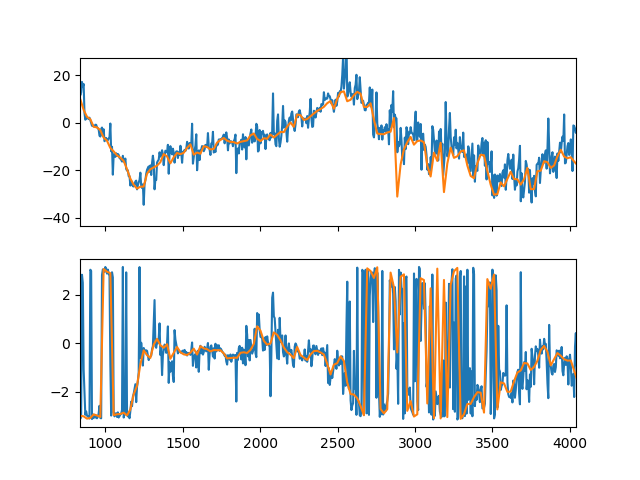

In [40]:
fig,ax = plt.subplots(2,sharex=True)
#plt.plot(ff,20*np.log10(np.abs(fresp)))
#_=plt.plot(ff,20*np.log10(np.abs(fy)).T)
_=ax[0].plot(ff,20*np.log10(np.abs((fresp))))
_=ax[1].plot(ff,(np.angle(fresp)))
fresp1,ff1=tf.tfe(data[:,3],data[:,2],Fs=au.rate,NFFT=2**11)
_=ax[0].plot(ff1,20*np.log10(np.abs((fresp1))))
_=ax[1].plot(ff1,(-np.angle(fresp1)))



In [44]:
# Load File, read data, and pad to have same length on all channels

nfft=1024*2

tfdata = []

for file in dfiles:
    print(file)
    au = audacity.Aup(file)
    rdata = []
    maxl = 0
    for ii in range(au.nchannels):
        rdata.append(au.get_channel_data(ii))
        maxl = max(maxl,len(rdata[-1]))

    data = np.zeros((maxl,len(rdata)))
    for ii,rd in enumerate(rdata):
        data[:len(rd),ii]=rd
        
    delay=tf.determineDelay(data[:,0]/np.mean(data[:,0]),data[:,2]/np.mean(data[:,2]),maxdel=2**15)
    print("Delay: %d samples"%delay)
    data[:,0]=np.roll(data[:,0],delay)
    
    sr=au.rate
   
    tfxy,ff=tf.tfe(data[:,3],data[:,2],Fs=sr,NFFT=nfft)
    #tfxy,ff=my_tfe(data[:,3],data[:,2],Fs=sr,NFFT=nfft)
    #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
    ff,coh=sig.coherence(data[:,2],data[:,3],fs=sr,nperseg=nfft)

    datadict={'tf':tfxy,'coh':coh}
    
    for chno in [au.nchannels-2,au.nchannels-1]:
        tfxy,ff=tf.tfe(data[:,chno],data[:,0],Fs=sr,NFFT=nfft)
        #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
        # ff,coh=sig.coherence(data[:,0],data[:,chno],fs=sr,nperseg=nfft)
        datadict['mic%d'%(chno-1)]=tfxy
        
        
    datadict['sensRMS']=np.sqrt(np.mean((data[:,1]-np.mean(data[:,1]))**2))

    tfdata.append(datadict)


transfer/b-foot/2tieclip_reference_sines.aup
Delay: 1763 samples
transfer/b-foot/2301_openstart.aup
Delay: 1763 samples
transfer/b-foot/2301_closing_2.aup
Delay: 1763 samples
transfer/b-foot/2301_closing_4.aup
Delay: 1763 samples
transfer/b-foot/2301_closing_6.aup
Delay: 1763 samples
transfer/b-foot/2301_closing_8.aup
Delay: 1763 samples
transfer/b-foot/2301_closing_10.aup
Delay: 1763 samples
transfer/b-foot/2301_closing_11.aup
Delay: 1763 samples
transfer/b-foot/2301_closing_12.aup
Delay: 1763 samples
transfer/b-foot/2301_closing_13.aup
Delay: 1763 samples
transfer/b-foot/2301_closing_14.aup
Delay: 1763 samples
transfer/b-foot/2301_closing_15.aup
Delay: 1763 samples
transfer/b-foot/2301_closing_16.aup
Delay: 1763 samples


<IPython.core.display.Javascript object>


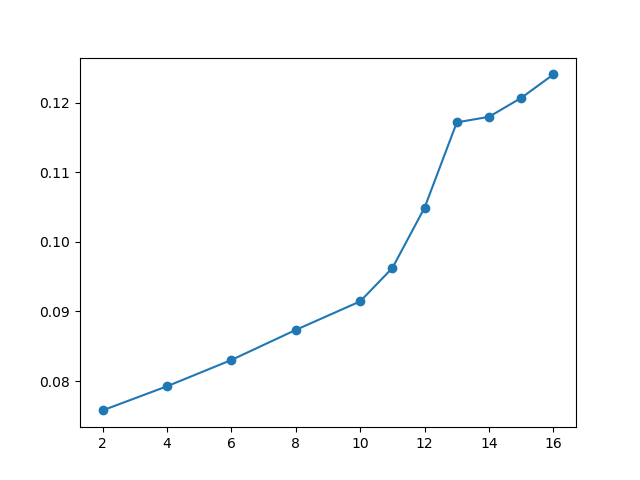

In [53]:
import re
positions = []
for file in dfiles:
    matches = re.findall('_[0-9]+',file)
    thispos = np.nan
    if len(matches) > 0:
        thispos = int(matches[0][1:])
        
    positions.append(thispos)

plt.figure()
plt.plot(positions, [xx['sensRMS'] for xx in tfdata],'o-')

In [51]:
import re
[re.findall('[0-9]+',xx) for xx in dfiles]

[['2'],
 ['2301'],
 ['2301', '2'],
 ['2301', '4'],
 ['2301', '6'],
 ['2301', '8'],
 ['2301', '10'],
 ['2301', '11'],
 ['2301', '12'],
 ['2301', '13'],
 ['2301', '14'],
 ['2301', '15'],
 ['2301', '16']]

<IPython.core.display.Javascript object>


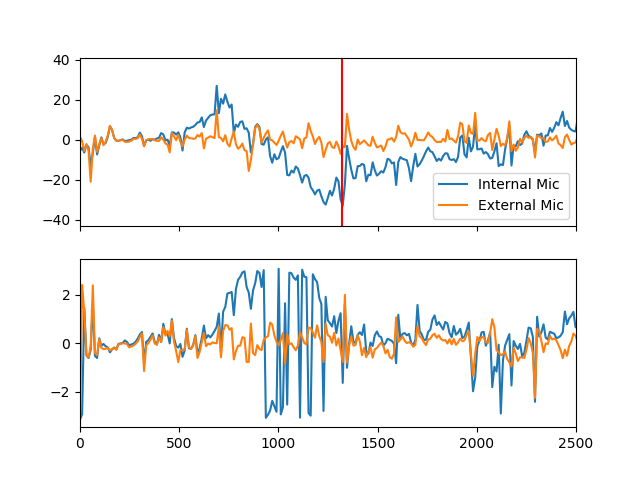

(0, 2500)

In [5]:
fig,ax = plt.subplots(2,sharex=True)

recno = 1
refno = 0
fig.set_label('Recording %d, internal vs external spectra' % recno)
ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['mic2']/tfdata[refno]['mic2'])), label='Internal Mic')
ax[1].plot(ff,(np.angle(tfdata[recno]['mic2']/tfdata[refno]['mic2'])))

ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['mic1']/tfdata[refno]['mic1'])), label='External Mic')
ax[1].plot(ff,(np.angle(tfdata[recno]['mic1']/tfdata[refno]['mic1'])))

ax[0].axvline(1319, C='r')
ax[0].legend(loc='lower right')
ax[0].set_xlim((0, 2500))


<IPython.core.display.Javascript object>


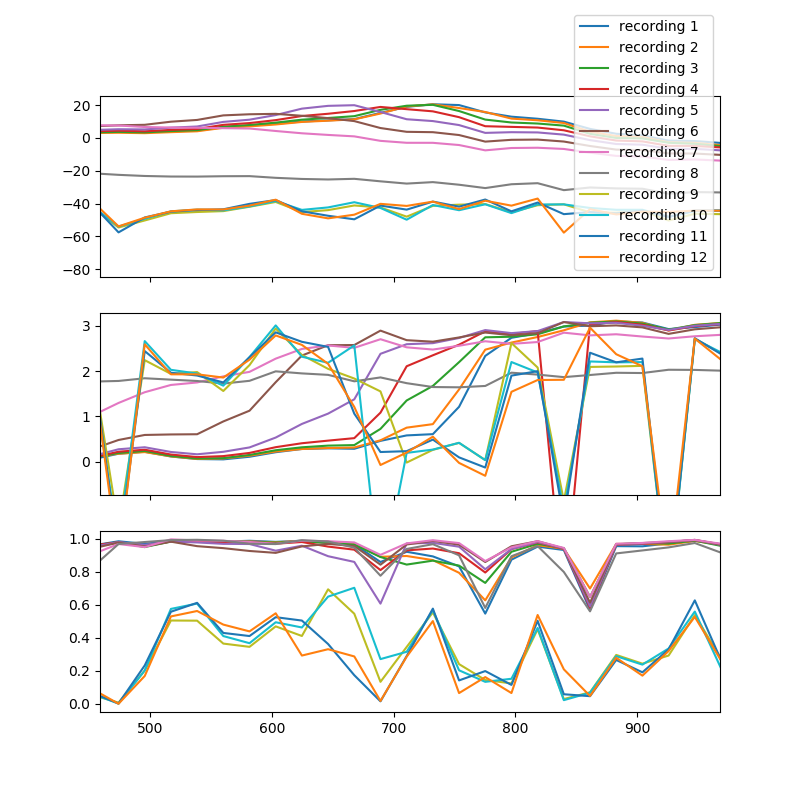

In [42]:
fig,ax = plt.subplots(3,sharex=True, figsize=((8, 8)))
fig.set_label('Transfer functions')

# chno = 1
refno = 0
for recno in [1,2,3,4,5,6,7,8,9,10,11,12]:

    #ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['tf']/tfdata[refno]['tf'])), label='recording %d' % recno)
    ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['tf'])), label='recording %d' % recno)
    ax[0].set_xlim((0, 4000))
    ax[0].legend(loc='lower right')
    ax[0].axvline(1319)
    #ax[1].plot(ff,(np.angle(tfdata[recno]['tf']/tfdata[refno]['tf'])))
    ax[1].plot(ff,(np.angle(tfdata[recno]['tf'])))
    #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
    ax[2].plot(ff,np.min([tfdata[recno]['coh'],tfdata[refno]['coh']],axis=0))


In [6]:
gamma=1.4
P_a=101000
rho_a=1.29

D=0.0139
S=np.pi*D
l=0.006
# L=l+0.3*D
A=S*l

bore=0.0186
foot=0.16

V=(np.pi*bore**2/4)*foot

omega=np.sqrt((gamma*A*P_a)/(V*l*rho_a))
f=omega/(2*np.pi)

S/l, f

(7.2780229808163535, 1669.9921952560444)

In [8]:
range?

In [43]:
np.mean((data[:,1]-np.mean(data[:,1]))**2)

0.015393434411066309